In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn import ensemble
import sklearn.metrics as metrics
import time


In [2]:
data = pd.read_csv("https://www.dropbox.com/s/qhf0ocdqb3gh7ni/logistic_regression.csv?dl=1") 
print(data.head())
data.info()

   admit  gre   gpa  rank
0      0  380  3.61     3
1      1  660  3.67     3
2      1  800  4.00     1
3      1  640  3.19     4
4      0  520  2.93     4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
admit    400 non-null int64
gre      400 non-null int64
gpa      400 non-null float64
rank     400 non-null int64
dtypes: float64(1), int64(3)
memory usage: 12.6 KB


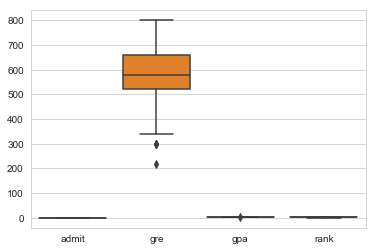

In [3]:
sns.set_style("whitegrid")
sns.boxplot(data=data)
plt.show()

C:\Users\nagad\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


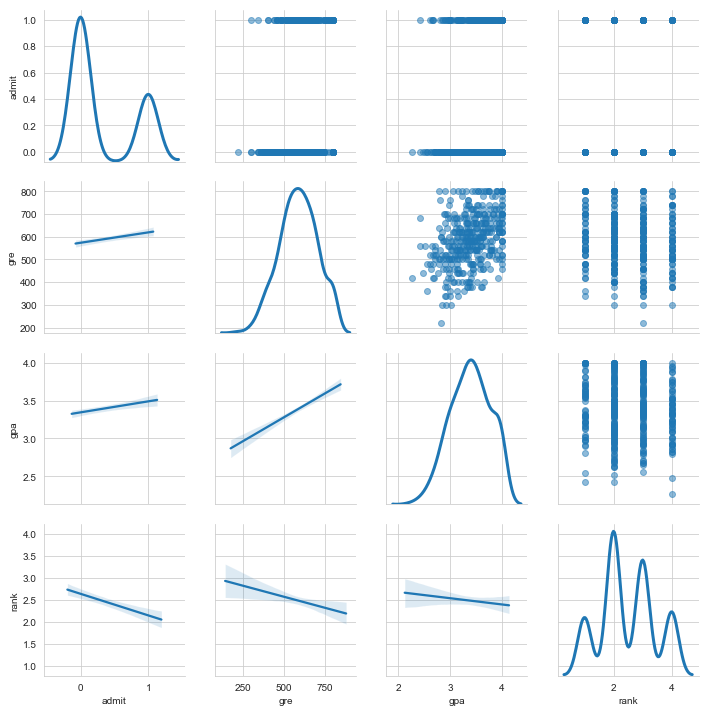

In [4]:
g = sns.PairGrid(data, diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

There is good relationship (as seen by the slope of the line) between the outcome variable 'admit' and the predictor variables such as gpa, gre and rank

In [5]:
data.columns

Index(['admit', 'gre', 'gpa', 'rank'], dtype='object')

In [6]:
# This is the decision tree model at first
# Initialize and train our tree.
X=data[['gre', 'gpa', 'rank']]
Y=data['admit']

# START TIME
start_time = time.time()

decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=3,
    random_state = 1337
)

decision_tree.fit(X, Y)
y_pred=decision_tree.predict(X)
print("--- %s seconds ---" % (time.time() - start_time))
# END TIME

score=cross_val_score(decision_tree,X=X,y=Y, cv=10)
print ('The score or accuracy', score)
print("Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))


--- 0.004996538162231445 seconds ---
The score or accuracy [0.73170732 0.63414634 0.7804878  0.775      0.75       0.7
 0.7        0.66666667 0.74358974 0.64102564]
Accuracy: 0.71 (+/- 0.10)


In [7]:
from sklearn.metrics import confusion_matrix
conf_mat=confusion_matrix(Y, y_pred)
print (conf_mat)
print ('The sensitivity i.e true positives is {0:2f}% '.format(conf_mat[1,1]/(conf_mat[1,1]+conf_mat[1,0])*100))
print ('The specificity i.e true negatives is {0:2f}% '.format(conf_mat[0,0]/(conf_mat[0,0]+conf_mat[0,1])*100))
print ('The Type I error i.e. false negatives is {0:2f}% '.format(conf_mat[1,0]/(conf_mat[1,0]+conf_mat[0,0])*100))
print ('The Type II error i.e. false positives is {0:2f}% '.format(conf_mat[0,1]/(conf_mat[0,1]+conf_mat[1,1])*100))

[[265   8]
 [102  25]]
The sensitivity i.e true positives is 19.685039% 
The specificity i.e true negatives is 97.069597% 
The Type I error i.e. false negatives is 27.792916% 
The Type II error i.e. false positives is 24.242424% 


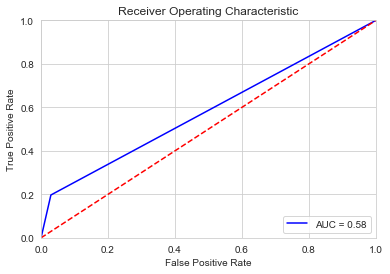

In [8]:
fpr, tpr, threshold = metrics.roc_curve(Y, y_pred)
roc_auc = metrics.auc(fpr, tpr)

#plotting ROC/AUC
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



In [9]:
# START TIME
start_time = time.time()

rfc = ensemble.RandomForestClassifier(n_estimators=150)
rfc.fit(X, Y)
# PRedicting with RFC 
y_pred=rfc.predict(X)

print("--- %s seconds ---" % (time.time() - start_time))
# END TIME
score=cross_val_score(rfc,X=X,y=Y, cv=10)
print ('\n Accuracy: %0.2f (+/- %0.2f)' % (score.mean(), score.std()))

--- 0.21386957168579102 seconds ---

 Accuracy: 0.68 (+/- 0.06)


In [10]:
from sklearn.metrics import confusion_matrix
conf_mat=confusion_matrix(Y, y_pred)
print (conf_mat)
print ('The sensitivity i.e true positives is {0:2f}% '.format(conf_mat[1,1]/(conf_mat[1,1]+conf_mat[1,0])*100))
print ('The specificity i.e true negatives is {0:2f}% '.format(conf_mat[0,0]/(conf_mat[0,0]+conf_mat[0,1])*100))
print ('The Type I error i.e. false negatives is {0:2f}% '.format(conf_mat[1,0]/(conf_mat[1,0]+conf_mat[0,0])*100))
print ('The Type II error i.e. false positives is {0:2f}% '.format(conf_mat[0,1]/(conf_mat[0,1]+conf_mat[1,1])*100))

[[271   2]
 [  2 125]]
The sensitivity i.e true positives is 98.425197% 
The specificity i.e true negatives is 99.267399% 
The Type I error i.e. false negatives is 0.732601% 
The Type II error i.e. false positives is 1.574803% 


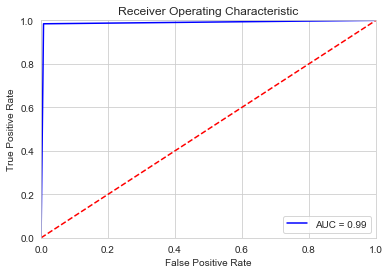

In [11]:

fpr, tpr, threshold = metrics.roc_curve(Y, y_pred)
roc_auc = metrics.auc(fpr, tpr)

#plotting ROC/AUC
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



It can be concluded that RFC is much better in terms of reducing errors drastically atleast in this dataset. The acuracy is not improved much here in this dataset. The AUC is also improved drastically which is a measure of again the errors.